<a href="https://colab.research.google.com/github/akitim/SkillFactory_current/blob/main/Unit_2_EDA_Chocolate_bars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preprocess

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
 
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок
 
import sys
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
sys.path.clear
sys.path.append('/content/gdrive/MyDrive/SkillFactory')
 
cacao = pd.read_csv('/content/gdrive/MyDrive/SkillFactory/cacao_flavors.csv')

Mounted at /content/gdrive


In [77]:
cacao.columns = ['bar_id','company','specific_origin','ref','review_date','cocoa_percent','company_location','rating','bean_type','bean_origin']
cacao.sample()

,bar_id,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,bean_origin
1510,1511,,"Abstract S. w/ Jamaica nibs,batch abs60323.0",1828,2016,75%,Canada,3.75,,"Ven.,Ecu.,Peru,Nic."


#bar_id

Number of unique bar_id's: 1795


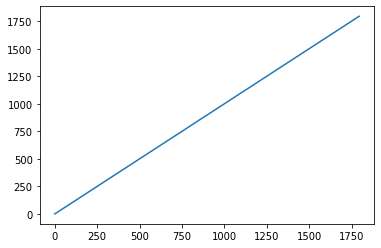

In [78]:
 print(f"Number of unique bar_id's: {cacao.bar_id.nunique()}")
plt.plot(cacao.bar_id)

In [79]:
cacao.drop(['bar_id'], inplace = True, axis = 1)
cacao.sample()

,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,bean_origin
986,Luker,Misterio,552,2010,58%,Colombia,3.0,,"Colombia, Ecuador"


#Задание 2.3.1

In [80]:
print (f"Number of companies in dataset + empty: {cacao.company.nunique()}")

Number of companies in dataset + empty: 408


In [81]:
cacao.company = cacao.company.apply(lambda x: None if x.strip() == '' else x)

Number of companies in dataset + empty: 407


In [82]:
cacao[cacao.company.apply (lambda x: type(x) != str)]

,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,bean_origin
8,None,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
16,None,Papua New Guinea,1015,2013,70%,France,3.25,,Papua New Guinea
67,None,"LamasdelChanka, San Martin, Oro Verde coop",1145,2013,72%,Peru,3.25,,Peru
78,None,Chuao,111,2007,70%,Italy,5.00,Trinitario,Venezuela
108,None,Phantom,1924,2016,70%,U.S.A.,4.00,Forastero (Nacional),Peru
...,...,...,...,...,...,...,...,...,...
1721,None,"Los Rios, Rancho Grande 2004/2007",153,2007,90%,U.S.A.,2.00,Forastero (Arriba),Ecuador
1746,None,Rio Caribe,457,2009,72%,U.K.,3.25,Trinitario,Venezuela
1747,None,"Guasare, Zulia Prov., 2015, batch 124",1912,2016,74%,U.S.A.,3.00,Criollo,Venezuela
1755,None,Sambirano,951,2012,70%,U.S.A.,3.25,Trinitario,Madagascar


In [74]:
display(pd.DataFrame(cacao.company.value_counts()))
print("Значений, встретившихся в столбце более 10 раз:"#Число 10 взято для ориентира, можно брать другое
      , (cacao.company.value_counts()>10).sum())
cacao.loc[:, ['company']].info()

,company
Soma,45
Fresco,26
Bonnat,26
Pralus,25
Domori,22
...,...
Cacao Arabuco,1
The Barn,1
Mayacama,1
Jordis,1


Значений, встретившихся в столбце более 10 раз: 30
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   company  1696 non-null   object
dtypes: object(1)
memory usage: 14.1+ KB


#Задание 2.3.2

In [82]:
cacao.